# Prep: Polynomial Linear Regression

__Objective__: Play with an example of polynomial regression to prep for our class discussion on Thursday.

## PART 1: Linear Data

__To do__: Run the cell below to see a line fit to a linear data set.

Data generated with the equation:
Y_noisy = 3*X + 10 + noise

W_noisy:
[[3.551]
 [9.294]]

W_clean:
[[ 3.]
 [10.]]


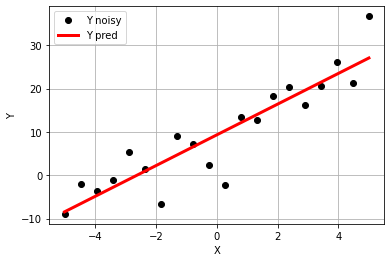

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
np.random.seed( 251 )

# A linear dataset: y = 10x + 3
n = 20
slope =  3
offset = 10
noise = np.random.normal( 0, 5, (n,1))
X = np.linspace( -5, 5, n ).reshape((n,1))
Y_clean = slope*X + offset
Y_noisy = Y_clean + noise
print("Data generated with the equation:")
print("Y_noisy = {0}*X + {1} + noise".format(slope, offset))

# Tack a homogeneous coordinate (H) onto the independent variable (X)
H = np.ones((X.shape))
A = np.hstack((X,H))

# Linear Regression on the noisy data
W_noisy = np.linalg.lstsq(A, Y_noisy, rcond=None)[0]
Y_pred = A @ W_noisy
print("\nW_noisy:")
print( W_noisy )

# Linear Regression on the "ideal" clean data
W_clean = np.linalg.lstsq(A, Y_clean, rcond=None)[0]
print("\nW_clean:")
print( W_clean )

# Visualization
plt.plot( X[:,0], Y_noisy[:,0], "ok", label="Y noisy" )
#plt.plot( X[:,0], Y_clean[:,0], '-ob', label="Y clean")
plt.plot( X[:,0], Y_pred[:,0], '-r', linewidth=3, label="Y pred")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

## PART 2: Polynomial Data

__To do__: Run the cell below to see a line fit to a polynomial data set.

Data generated with the equation:
Y = 0.1*X**3 - 3*X + 10

W:
[[-1.348]
 [10.   ]]


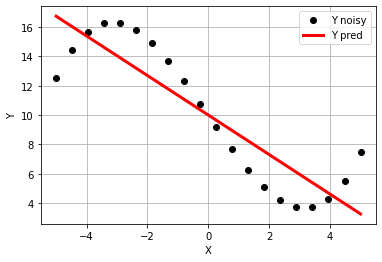

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
np.random.seed( 251 )

# A cubic dataset
n = 20
X = np.linspace( -5, 5, n ).reshape((n,1))
Y = 0.1*X**3 - 3*X + 10
print("Data generated with the equation:")
print("Y = 0.1*X**3 - 3*X + 10")

# Tack a homogeneous coordinate (H) onto the independent variable (X)
H = np.ones((X.shape))
A = np.hstack((X,H))

# Linear Regression: Y = m*x + b
W = np.linalg.lstsq(A, Y, rcond=None)[0]
Y_pred = A @ W
print("\nW:")
print( W )

# Visualization
plt.plot( X[:,0], Y[:,0], "ok", label="Y noisy" )
plt.plot( X[:,0], Y_pred[:,0], '-r', linewidth=3, label="Y pred")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()

Hmmm... That doesn't seem right. Let's try explaining to Numpy that this is a 3rd-order polynomial:


W3:
[[ 0.1]
 [ 0. ]
 [-3. ]
 [10. ]]


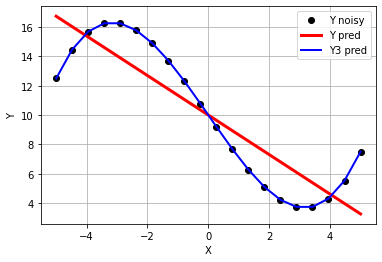

In [3]:
# Linear Regression: Y = m[0]*x^3 + m[1]*x^2 + m[2]*x + b
A3 = np.hstack((X**3,X**2,X,H))
W3 = np.linalg.lstsq(A3, Y, rcond=None)[0]
Y3_pred = A3 @ W3
print("\nW3:")
print( W3 )

# Visualization
plt.plot( X[:,0], Y[:,0], "ok", label="Y noisy" )
plt.plot( X[:,0], Y_pred[:,0], '-r', linewidth=3, label="Y pred")
plt.plot( X[:,0], Y3_pred[:,0], '-b', linewidth=2, label="Y3 pred")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend()
plt.show()